# Implementation of Grover's Algorithm using 2 qubits:

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

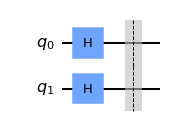

In [2]:
## Creating function for Equal Superposition states of two qubits:
def initialize(qc):
    qc.h(0)         # Applying H gates to both qubits
    qc.h(1)         # and initializing grover circuit
    qc.barrier()
grover_circuit = QuantumCircuit(2)
initialize(grover_circuit)
grover_circuit.draw('mpl') 

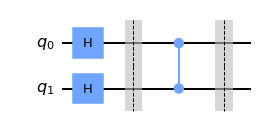

In [3]:
# Let's try to find the position of |11>:
def oracle_11(qc):  # Apply a controlled Z gate
    qc.cz(0,1)
    qc.barrier()
oracle_11(grover_circuit)
grover_circuit.draw('mpl')    

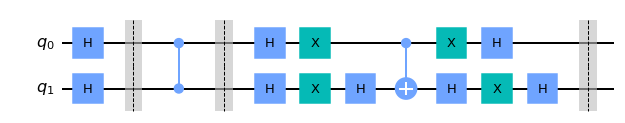

In [4]:
# Creating Grover's Diffusion operator:
def u_g(qc):
    qc.h(0)
    qc.h(1)
    qc.x(0)
    qc.x(1)
    qc.h(1)
    qc.cx(0,1)
    qc.x(0)
    qc.h(1)
    qc.h(0)
    qc.x(1)
    qc.h(1)
    qc.barrier()
u_g(grover_circuit)        # temporary circuit just to see what U_s looks like
grover_circuit.draw('mpl')    

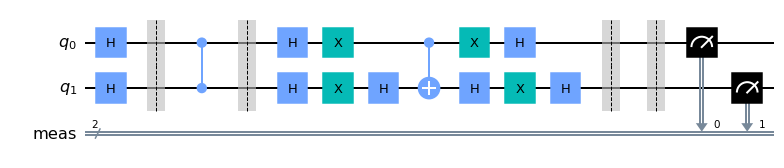

In [5]:
# Finally we measure the circuit:
grover_circuit.measure_all()
grover_circuit.draw('mpl')

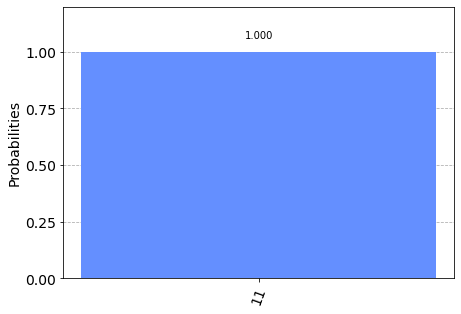

In [6]:
# Simulating the Circuit:
backend = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
# Experimenting with real device:
IBMQ.load_account()
# Getting the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2021-07-22 09:28:44,275: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmqx2


In [8]:
# Running the circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, backend, optimization_level=3)
qobj = assemble(transpiled_grover_circuit)
job = backend.run(qobj)
job_monitor(job, interval=2)

<ipython-input-8-34d695aabe5e>:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


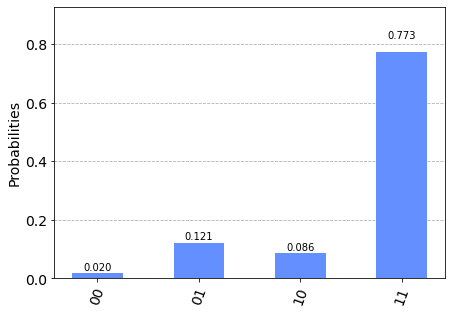

In [9]:
# Getting the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)